In [2]:
pip install dash dash-bootstrap-components

   ---------------------------------------- 0.0/222.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/222.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/222.5 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/222.5 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 51.2/222.5 kB 327.7 kB/s eta 0:00:01
   -------- ------------------------------ 51.2/222.5 kB 327.7 kB/s eta 0:00:01
   -------------- ------------------------ 81.9/222.5 kB 351.4 kB/s eta 0:00:01
   ---------------- ---------------------- 92.2/222.5 kB 327.7 kB/s eta 0:00:01
   ------------------- ------------------ 112.6/222.5 kB 344.8 kB/s eta 0:00:01
   ------------------- ------------------ 112.6/222.5 kB 344.8 kB/s eta 0:00:01
   ------------------------ ------------- 143.4/222.5 kB 355.0 kB/s eta 0:00:01
   ------------------------ ------------- 143.4/222.5 kB 355.0 kB/s eta 0:00:01
   ------------------------ ------------- 143.4/222.5 kB 

In [2]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px

In [3]:
# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
# Rename the columns with dictionary
new_column_names = {
    'person_age': 'Age',
    'person_income': 'Income',
    'person_home_ownership': 'Home_Ownership',
    'person_emp_length': 'Employment_Length',
    'loan_intent': 'Loan_Intent',
    'loan_grade': 'Loan_Grade',
    'loan_amnt': 'Loan_Amount',
    'loan_int_rate': 'Interest_Rate',
    'loan_status': 'Loan_Status',
    'loan_percent_income': 'Income_Percentage',
    'cb_person_default_on_file': 'Default_History',
    'cb_person_cred_hist_length': 'Credit_History_Length'
}

# rename the columns
df.rename(columns=new_column_names, inplace=True)


In [7]:
df.isnull().sum()

Age                         0
Income                      0
Home_Ownership              0
Employment_Length         895
Loan_Intent                 0
Loan_Grade                  0
Loan_Amount                 0
Interest_Rate            3116
Loan_Status                 0
Income_Percentage           0
Default_History             0
Credit_History_Length       0
dtype: int64

In [8]:
# Distribution of numerical values
numeric_columns = df.select_dtypes(include=['float','int']).columns
numeric_columns

Index(['Age', 'Income', 'Employment_Length', 'Loan_Amount', 'Interest_Rate',
       'Loan_Status', 'Income_Percentage', 'Credit_History_Length'],
      dtype='object')

In [9]:
# Detect outliers using IQR
outlier_dict = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25) # for 25th percentile
    Q3 = df[col].quantile(0.75) # for 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
# identify outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
outlier_dict = outliers.shape[0]
print(f"{col}: {outlier_dict} outliers detected")

Credit_History_Length: 1142 outliers detected


In [10]:
# Checking if the data is normally distributed
for column in numeric_columns:
    print(f"Column: {column}")
    print(f" Mean {df[column].mean()}")
    print(f" Median {df[column].median()}")
    print(f"  Mode: {df[column].mode()[0] if not df[column].mode().empty else 'No Mode'}")
    print("-"*40)

Column: Age
 Mean 27.73459992019889
 Median 26.0
  Mode: 23
----------------------------------------
Column: Income
 Mean 66074.84846996715
 Median 55000.0
  Mode: 60000
----------------------------------------
Column: Employment_Length
 Mean 4.789686296787225
 Median 4.0
  Mode: 0.0
----------------------------------------
Column: Loan_Amount
 Mean 9589.371105859243
 Median 8000.0
  Mode: 10000
----------------------------------------
Column: Interest_Rate
 Mean 11.011694892245036
 Median 10.99
  Mode: 7.51
----------------------------------------
Column: Loan_Status
 Mean 0.21816396059052823
 Median 0.0
  Mode: 0
----------------------------------------
Column: Income_Percentage
 Mean 0.1702034928332464
 Median 0.15
  Mode: 0.1
----------------------------------------
Column: Credit_History_Length
 Mean 5.804211043246064
 Median 4.0
  Mode: 2
----------------------------------------


In [11]:
# Detect Outliers Using Z-Score
from scipy.stats import zscore

z_scores = df[numeric_columns].apply(zscore)
z_outliers = (z_scores.abs() > 3).sum()  # Z-Score threshold (e.g., |z| > 3)
print("\nZ-Score Outlier Counts:")
print(z_outliers)

# Step 6: Summary
print("\nOutlier Counts by IQR Method:")
print(outlier_dict)


Z-Score Outlier Counts:
Age                      558
Income                   233
Employment_Length          0
Loan_Amount              337
Interest_Rate              0
Loan_Status                0
Income_Percentage        336
Credit_History_Length    284
dtype: int64

Outlier Counts by IQR Method:
1142


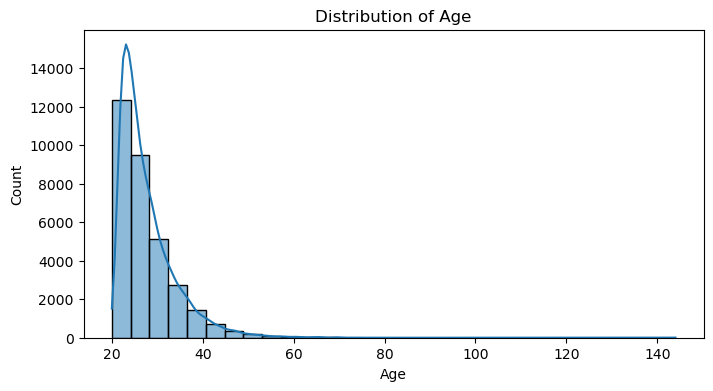

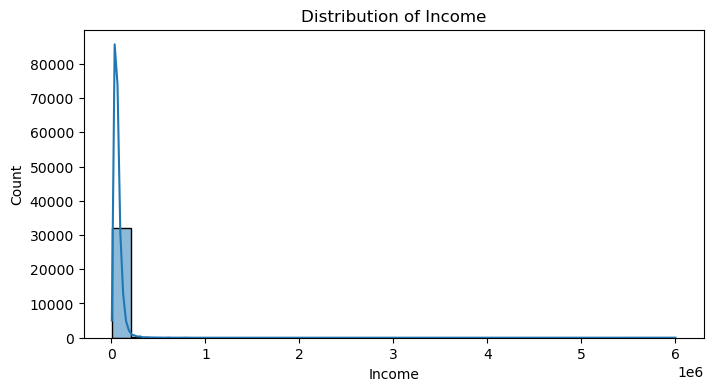

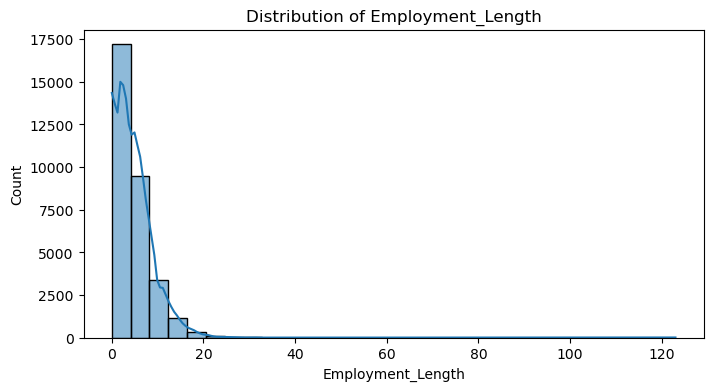

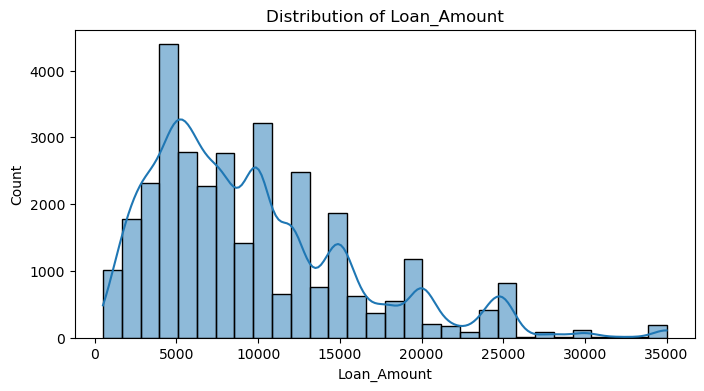

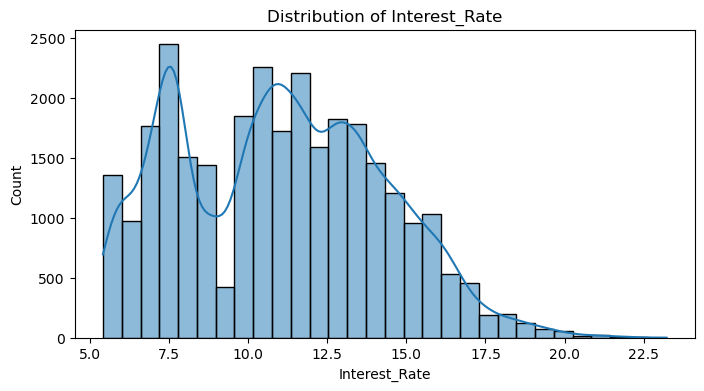

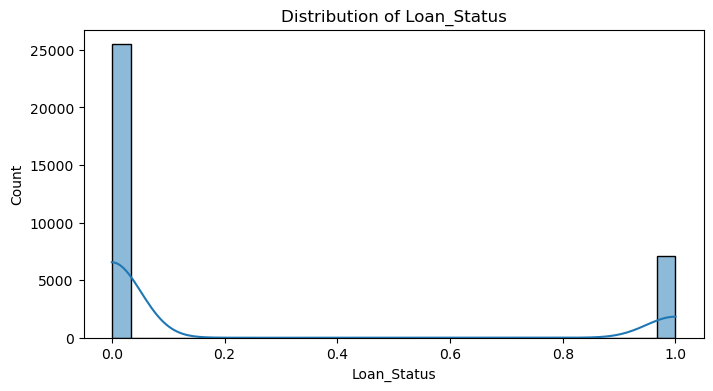

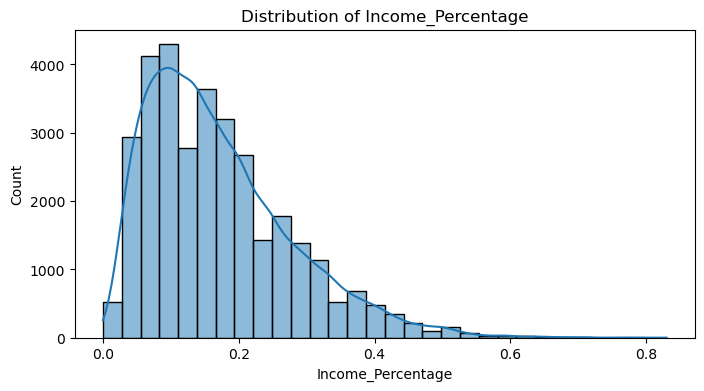

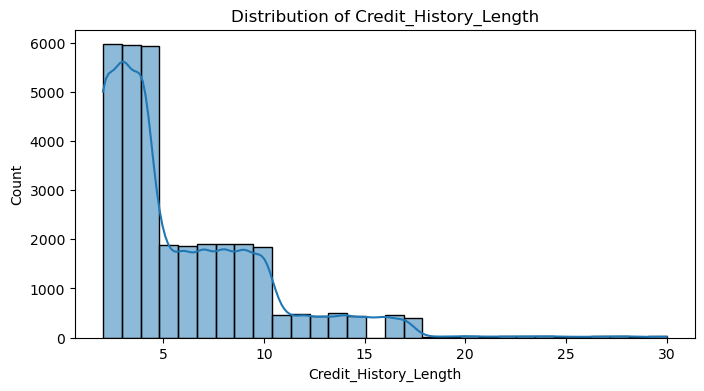

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over numeric columns and plot histograms and KDEs
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

In [13]:
for column in numeric_columns:
    print(f"Column: {column}")
    print(f"  Skewness: {df[column].skew()}")
    print(f"  Kurtosis: {df[column].kurt()}")
    print("-" * 40)

Column: Age
  Skewness: 2.5813925261849846
  Kurtosis: 18.560824765312866
----------------------------------------
Column: Income
  Skewness: 32.865348833904434
  Kurtosis: 2693.272775674123
----------------------------------------
Column: Employment_Length
  Skewness: 2.6144551214595424
  Kurtosis: 43.722338216746564
----------------------------------------
Column: Loan_Amount
  Skewness: 1.1924774277661998
  Kurtosis: 1.4235653072764443
----------------------------------------
Column: Interest_Rate
  Skewness: 0.2085503016908977
  Kurtosis: -0.6716091079813706
----------------------------------------
Column: Loan_Status
  Skewness: 1.3648884873271683
  Kurtosis: -0.13708783613132303
----------------------------------------
Column: Income_Percentage
  Skewness: 1.0646686367683245
  Kurtosis: 1.2236866782856817
----------------------------------------
Column: Credit_History_Length
  Skewness: 1.6617901199126253
  Kurtosis: 3.7161938192947908
----------------------------------------


In [14]:
# We will be using mean imputation to fill the null values because the column is normally distributed
missing_data_int_rate = df['Interest_Rate'].isnull().sum()
print(f"Missing data before mean imputation: {missing_data_int_rate}")

# Calculate the mean in the interest rate column
mean_int_rate = df['Interest_Rate'].mean()
print(f"The mean of the interest column: {mean_int_rate}")

# fill the missing values in the interest rate column with the mean of the column
df['Interest_Rate'] = df['Interest_Rate'].fillna(mean_int_rate)

# check for missing values after imputation
missing_data_int_rate = df['Interest_Rate'].isnull().sum()
print(f"Missing values after mean imputation: {missing_data_int_rate}")

Missing data before mean imputation: 3116
The mean of the interest column: 11.011694892245036
Missing values after mean imputation: 0


In [15]:
df.head()

,Age,Income,Home_Ownership,Employment_Length,Loan_Intent,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Status,Income_Percentage,Default_History,Credit_History_Length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
# Set up the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [20]:
# Layout of the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Loan Interest Rate Analysis Dashboard", className="text-center mb-4"), width=12)
    ]),
    dbc.Row([
        dbc.Col([
            html.Label("Filter by Home ownership Status:"),
            dcc.Dropdown(
                id="home_ownership_filter",
                options=[{"label": status, "value": status} for status in df['Home_Ownership'].unique()],
                multi=True,
                placeholder="Select Home ownership Status",
                value=df['Home_Ownership'].unique()
            )
        ], width=4),
        dbc.Col([
            html.Label("Filter by Age Range:"),
            dcc.RangeSlider(
                id="age_filter",
                min=df['Age'].min(),
                max=df['Age'].max(),
                step=1,
                marks={i: str(i) for i in range(int(df['Age'].min()), int(df['Age'].max()) + 1, 10)},
                value=[df['Age'].min(), df['Age'].max()]
            )
        ], width=4),
        dbc.Col([
            html.Label("Filter by Income Range:"),
            dcc.RangeSlider(
                id="income_filter",
                min=df['Income'].min(),
                max=df['Income'].max(),
                step=5000,
                marks={i: f"${i}" for i in range(int(df['Income'].min()), int(df['Income'].max()) + 1, 20000)},
                value=[df['Income'].min(), df['Income'].max()]
            )
        ], width=4),
    ], className="mb-4"),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id="loan_int_rate_plot")
        ], width=12)
    ])
], fluid=True)

In [27]:
@app.callback(
    Output("loan_int_rate_plot", "figure"),
    [
        Input("home_ownership_filter", "value"),
        Input("age_filter", "value"),
        Input("income_filter", "value"),
    ]
)
def update_graph(home_ownership_filter, age_range, income_range):
    # Filter the dataset
    filtered_df = df[
        (df['Home_Ownership'].isin(home_ownership_filter)) &
        (df['Age'] >= age_range[0]) & (df['Age'] <= age_range[1]) &
        (df['Income'] >= income_range[0]) & (df['Income'] <= income_range[1])
    ]

    # Create the visualization
    fig = px.box(
        filtered_df,
        x="Home_Ownership",
        y="Interest_Rate",
        color="Home_Ownership",
        title="Loan Interest Rate by Home ownership Status",
        labels={"Interest_Rate": "Interest Rate (%)", "Home_Ownership": "Home ownership Status"},
        hover_data=["Age", "Income"]
    )
    fig.update_layout(transition_duration=500)

    return fig


In [29]:
# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)

AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.